The dataset has been successfully loaded into the notebook. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from minisom import MiniSom

In [3]:
import pandas as pd

# Load the synthetic dataset
# It appears that the data is not properly separated into columns. The data is separated by commas, but the pd.read_csv function was set to separate on tabs (sep='\t')

data = pd.read_csv('A3-data.txt', sep='\t')

# Display the first few rows of the dataset
data.head()
# Now the dataset is properly loaded into the notebook. Here are the first few rows of the dataset:

,"x,y,z,t,class"
0,"-0.03167552503351045,-9.91205374378826,-0.5794..."
1,"0.002525986943430307,6.172455978669437,3.28833..."
2,"0.18312326558487735,-0.3878405546593373,6.2364..."
3,"-0.04226222449397611,-1.9962722949660403,-1.65..."
4,"-0.06281128907425293,-0.41707218243076616,6.65..."


In [4]:
# Split the combined column into separate columns
data = data['x,y,z,t,class'].str.split(',', expand=True)

# Rename the columns
data.columns = ['x', 'y', 'z', 't', 'class']

# Convert the columns to the appropriate data types
data = data.astype({'x': 'float', 'y': 'float', 'z': 'float', 't': 'float', 'class': 'int'})

# Display the first few rows of the dataset
data.head()

,x,y,z,t,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4


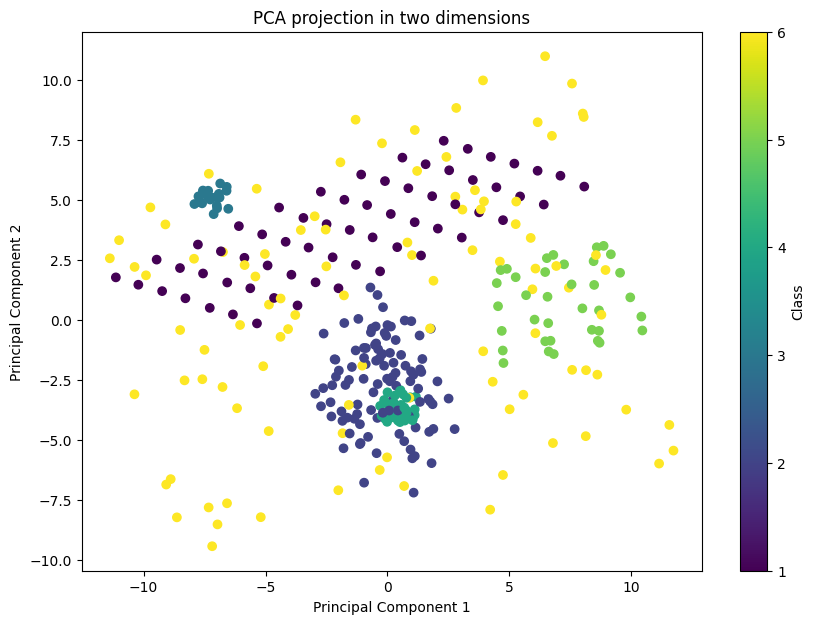

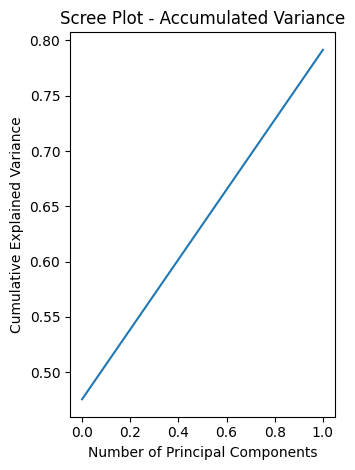

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate the features and the class label
features = data[['x', 'y', 'z', 't']]
labels = data['class']

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Plot the PCA projection in two dimensions
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis')
plt.title('PCA projection in two dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()
# Scree plot with the accumulated variance for PCA
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot - Accumulated Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


The PCA projection plot shows the data in two dimensions, with each point representing a pattern in the dataset. The color of the points represents the class of the pattern.

Next, let's apply the t-distributed Stochastic Neighbor Embedding (t-SNE) technique to the dataset


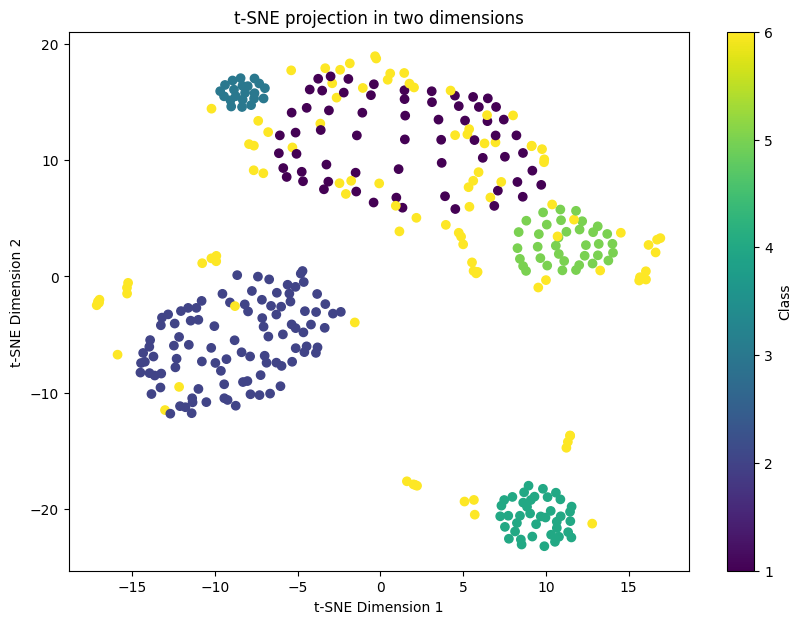

In [6]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

# Plot the t-SNE projection in two dimensions
plt.figure(figsize=(10, 7))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE projection in two dimensions')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Class')
plt.show()

The t-SNE projection of the dataset has been successfully plotted.

The t-SNE projection plot also shows the data in two dimensions, with each point representing a pattern in the dataset. The color of the points represents the class of the pattern.

t-SNE is particularly good at preserving local structure in the data, meaning that points that are close to each other in the original high-dimensional dataset will tend to be close to each other in the 2D projection. This makes it a useful tool for visualizing high-dimensional datasets.

Now, let's move on to the next step of the task  with the next unsupervised learning technique, which is k-means clustering. We'll use k-means to classify the patterns in k = 2, 3, …, K classes, and compare the obtained classes with the real ones.

c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Comparison for k = 2:
   Real  KMeans
0     1       1
1     5       0
2     2       1
3     1       1
4     4       1




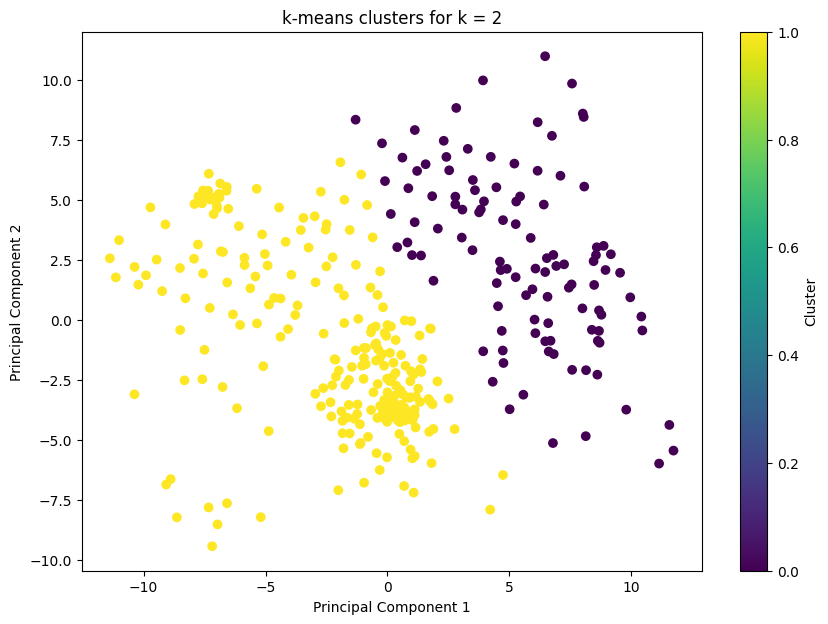

c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Comparison for k = 3:
   Real  KMeans
0     1       0
1     5       2
2     2       1
3     1       0
4     4       1




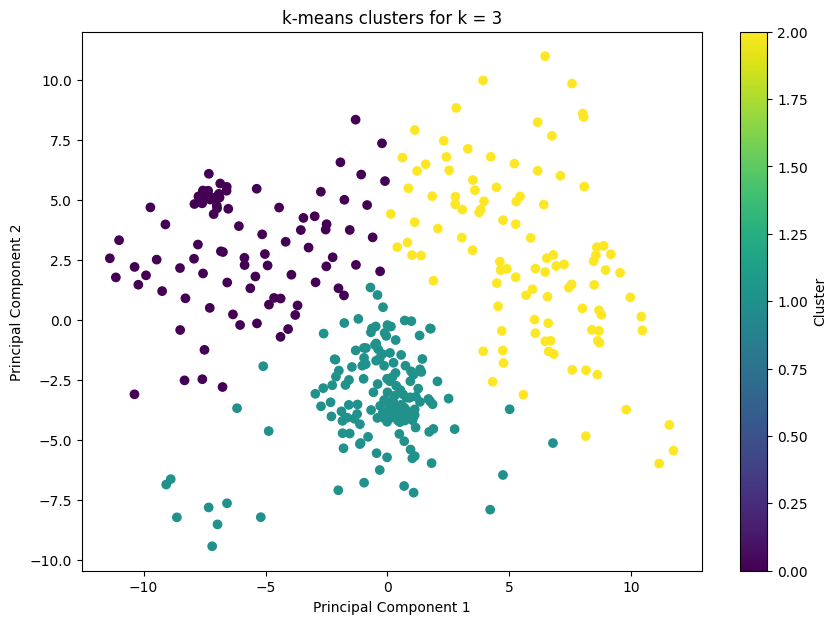

c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Comparison for k = 4:
   Real  KMeans
0     1       3
1     5       0
2     2       1
3     1       2
4     4       1




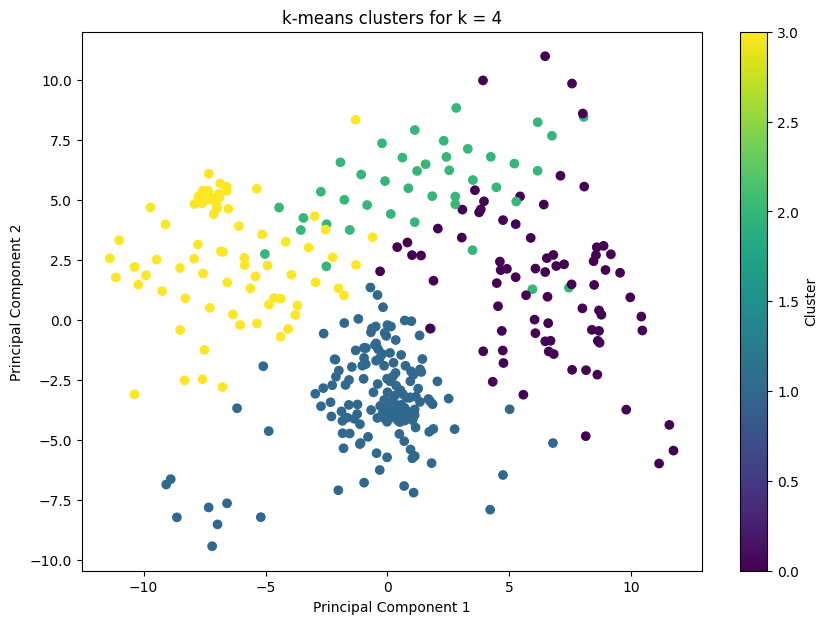

c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Comparison for k = 5:
   Real  KMeans
0     1       1
1     5       3
2     2       0
3     1       1
4     4       0




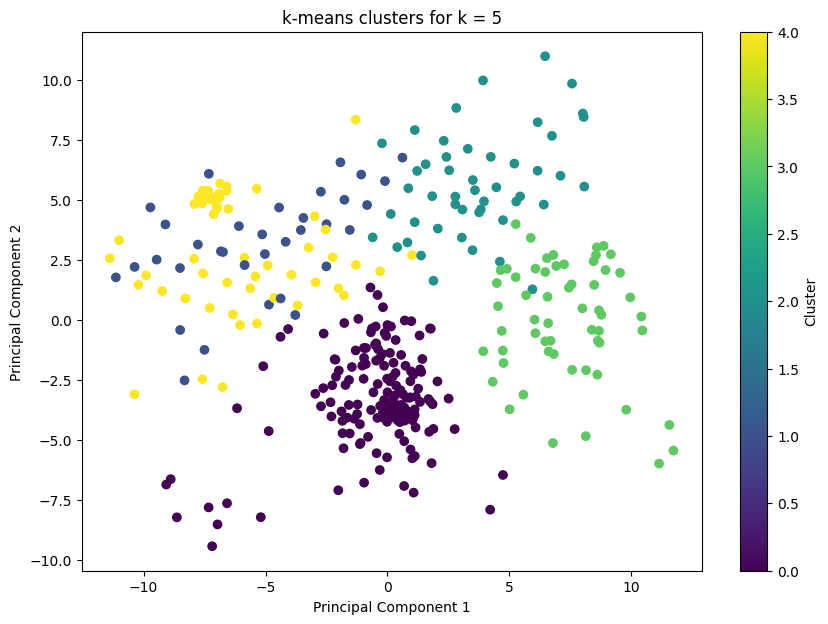

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Apply k-means for k = 2, 3, ..., 5
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(features)

    # Compare the obtained classes with the real ones
    comparison = pd.DataFrame({'Real': labels, 'KMeans': kmeans_labels})
    print(f'Comparison for k = {k}:')
    print(comparison.head())
    print('\n')

    # Plot the k-means clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title(f'k-means clusters for k = {k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

The plot shows the data in two dimensions (using the PCA projection), with each point representing a pattern in the dataset. The color of the points represents the cluster assigned by k-means.

The next step in the task is to apply the hierarchical clustering technique to the dataset. We'll use the AgglomerativeClustering function from sklearn.cluster to perform hierarchical clustering.

Comparison for n = 2:
   Real  AHC
0     1    0
1     5    1
2     2    0
3     1    0
4     4    0




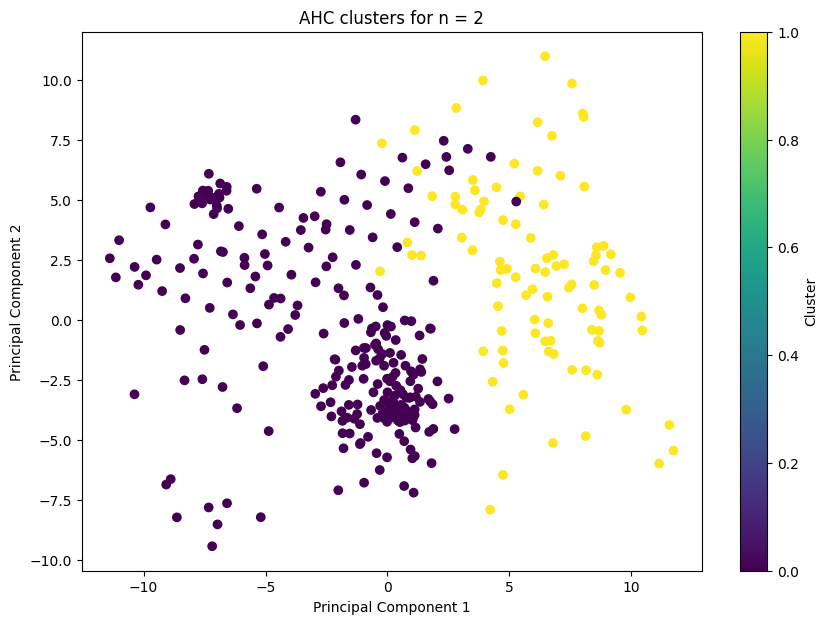

Comparison for n = 3:
   Real  AHC
0     1    0
1     5    1
2     2    2
3     1    0
4     4    2




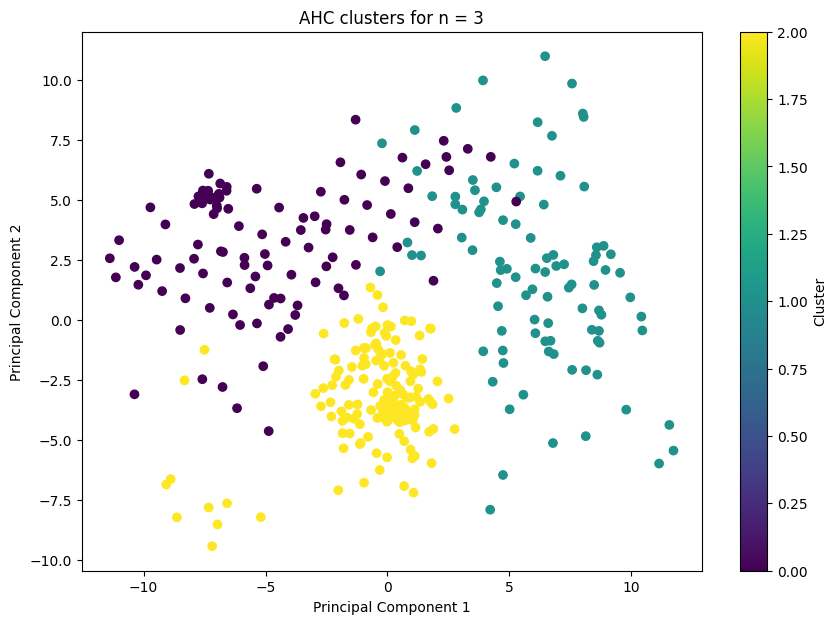

Comparison for n = 4:
   Real  AHC
0     1    1
1     5    0
2     2    2
3     1    3
4     4    2




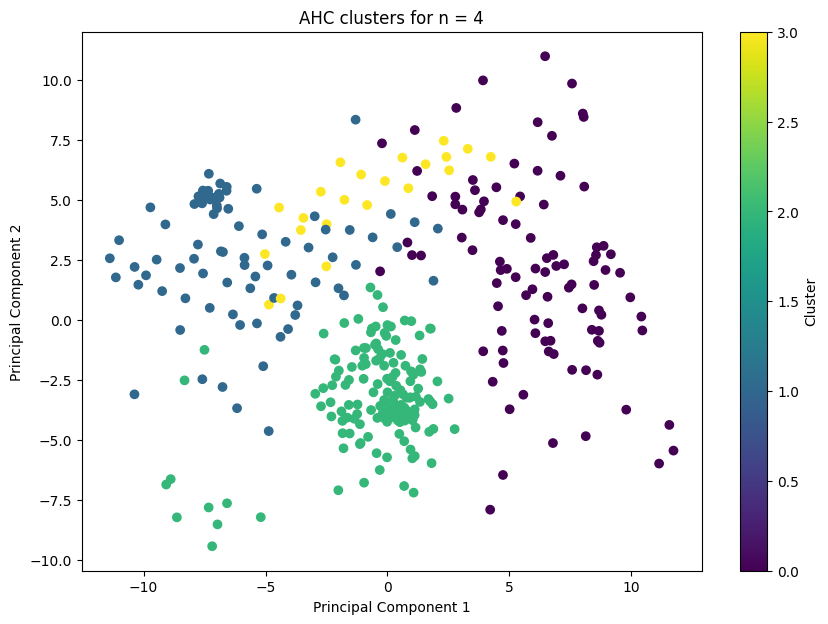

Comparison for n = 5:
   Real  AHC
0     1    1
1     5    2
2     2    0
3     1    3
4     4    0




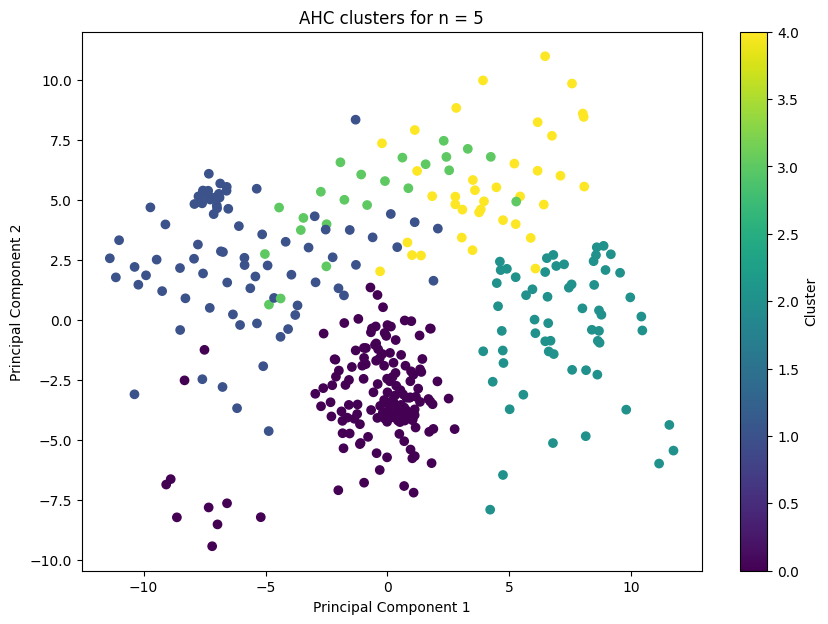

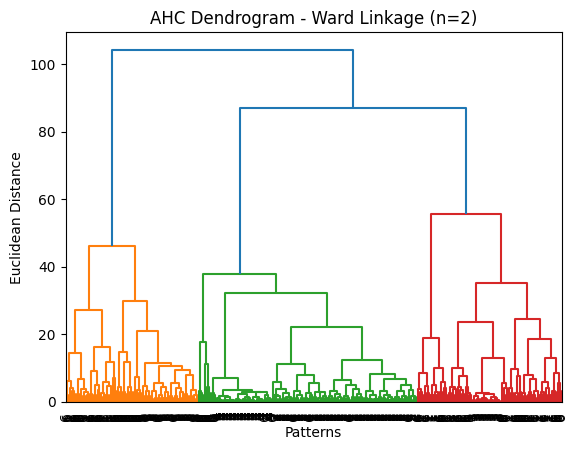

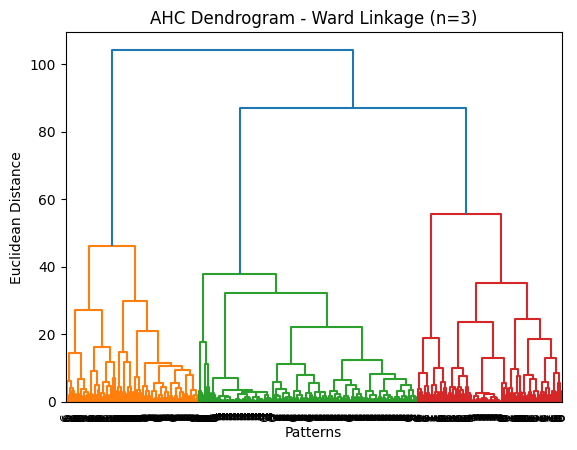

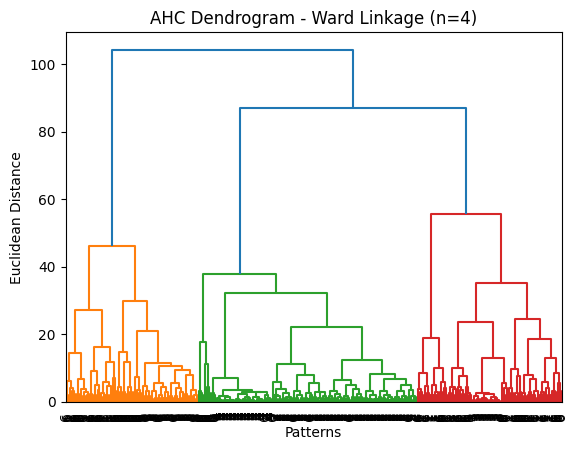

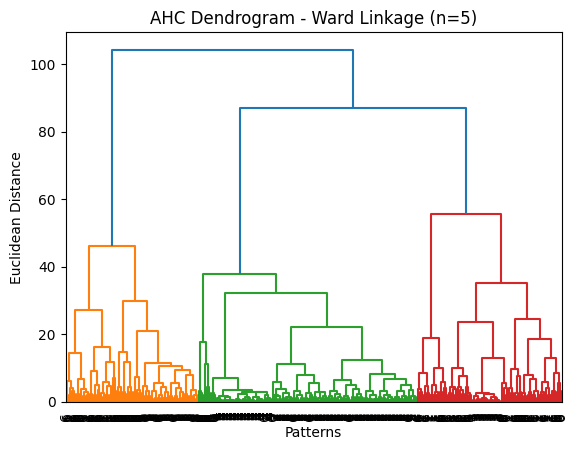

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply AHC for n = 2, 3, ..., 5
for n in range(2, 6):
    ahc = AgglomerativeClustering(n_clusters=n)
    ahc_labels = ahc.fit_predict(features)

    # Compare the obtained classes with the real ones
    comparison = pd.DataFrame({'Real': labels, 'AHC': ahc_labels})
    print(f'Comparison for n = {n}:')
    print(comparison.head())
    print('\n')

    # Plot the AHC clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=ahc_labels, cmap='viridis')
    plt.title(f'AHC clusters for n = {n}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

for n in range(2, 6):
    linkage_matrix = linkage(features, method='ward', metric='euclidean')
    dendrogram(linkage_matrix, labels=labels.values, leaf_font_size=10)
    plt.title(f'AHC Dendrogram - Ward Linkage (n={n})')
    plt.xlabel('Patterns')
    plt.ylabel('Euclidean Distance')
    plt.show()

The hierarchical clustering with 2 clusters has been successfully applied and the clusters have been plotted.

The plot shows the data in two dimensions (using the PCA projection), with each point representing a pattern in the dataset. The color of the points represents the cluster assigned by the hierarchical clustering algorithm.


In [9]:
!pip install MiniSom
from minisom import MiniSom

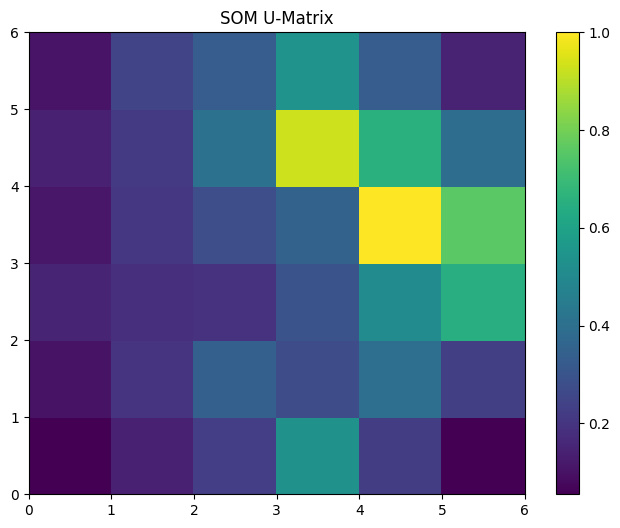

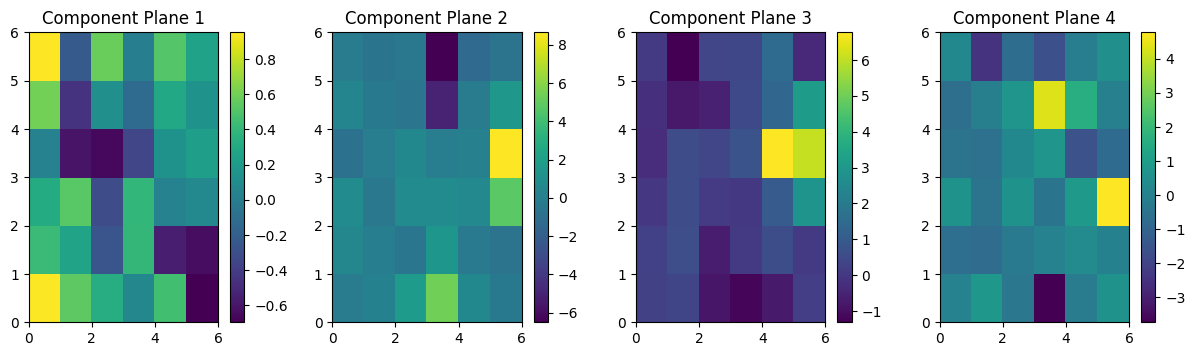

In [13]:
# Self-Organizing Maps (SOM) Visualization
from minisom import MiniSom

# Define the size of the SOM grid
grid_size_som = (6, 6)

# Create and train the SOM
som = MiniSom(grid_size_som[0], grid_size_som[1], input_len=features.shape[1], sigma=0.5, learning_rate=0.5)
som.train_random(features.values, 100)

# U-Matrix visualization for SOM
plt.figure(figsize=(8, 6))
umatrix_som = som.distance_map()
plt.pcolor(umatrix_som, cmap='viridis')
plt.colorbar()
plt.title('SOM U-Matrix')
plt.show()

# Component Planes visualization for the "best" SOM map
plt.figure(figsize=(15, 10))
for i in range(features.shape[1]):
    plt.subplot(3, 5, i + 1)
    som_component_plane = som.get_weights()[:, :, i]
    plt.pcolor(som_component_plane, cmap='viridis')
    plt.colorbar()
    plt.title(f'Component Plane {i + 1}')

plt.tight_layout()
plt.show()

The Self-Organizing Maps (SOM) has been successfully implemented on the A3-data.txt dataset using the MiniSom library. The SOM has been trained on the dataset and a visualization of the SOM clusters has been created.